# Running PCA
## The parameter file
Now that we have our merged dataset, it is time to prepare our `smartpca` run. For this, we will require a parameter file, which specifies all the parameters for our run. A typical paramater file looks like this:
```
## Input genotype dataset
genotypename:   forged_package/PCA_package_1.geno   ## Genotype data
snpname:    forged_package/PCA_package_1.snp        ## SNP information
indivname:  forged_package/PCA_package_1.ind        ## Individual information

## Desired output eigenvector and eigenvalue files
evecoutname:    smartpca_runs/poplist1/PCA_poplist1.evec           ## Eigenvectors
evaloutname:    smartpca_runs/poplist1/PCA_poplist1.eval           ## Eigenvalues

## The list of populations used in the PC calculation
poplistname:    PCA_poplists/PCA_poplist1.txt

## Other options
lsqproject: YES     ## Project individuals not included in PC calculation onto the PCs
outliermode: 2      ## Turns off automatic outlier removal.
numoutevec:  4       ## The number of eigenvectors to print per sample. Default is 10.
# numthreads: 1     ## How many parallel threads to use. Default is 1.
## Many more options exist. See https://github.com/DReichLab/EIG/tree/master/POPGEN for a full list.
```

So let's add this information to our first parameter file!

In [3]:
%%bash

mkdir -p scratch/smartpca_runs/poplist1 scratch/smartpca_runs/poplist2/

cat <<EOF > scratch/smartpca_runs/poplist1/parameters.par
genotypename:   scratch/forged_package/PCA_package_1.geno   ## Genotype data
snpname:    scratch/forged_package/PCA_package_1.snp        ## SNP information
indivname:  scratch/forged_package/PCA_package_1.ind        ## Individual information

evecoutname:    scratch/smartpca_runs/poplist1/PCA_poplist1.evec           ## Eigenvectors
evaloutname:    scratch/smartpca_runs/poplist1/PCA_poplist1.eval           ## Eigenvalues

poplistname:    PCA_poplists/PCA_poplist1.txt

lsqproject: YES     ## Project individuals not included in PC calculation onto the PCs
outliermode: 2      ## Turns off automatic outlier removal.
numoutevec:  4       ## The number of eigenvectors to print per sample. Default is 10.
EOF


(The syntax with the `<<EOF` is called a [Heredoc](https://tldp.org/LDP/abs/html/here-docs.html))

### Running smartpca
The poplist we just used contains various present-day Eurasian populations genotyped on the Human Origins array. Now that we made the parameter file, we are ready to run `smartpca`.

In [4]:
## Runtime of about 7 min
!smartpca -p scratch/smartpca_runs/poplist1/parameters.par

parameter file: smartpca_runs/poplist1/parameters.par
### THE INPUT PARAMETERS
##PARAMETER NAME: VALUE
genotypename: forged_package/PCA_package_1.geno   
snpname: forged_package/PCA_package_1.snp        
indivname: forged_package/PCA_package_1.ind        
evecoutname: smartpca_runs/poplist1/PCA_poplist1.evec           
evaloutname: smartpca_runs/poplist1/PCA_poplist1.eval           
poplistname: PCA_poplists/PCA_poplist1.txt
lsqproject: YES     
outliermode: 2      
numoutevec: 4       
## smartpca version: 16000
norm used

lsqproject used
^C


Once your run completes, you can look at the two output files. `smartpca_runs/poplist1/PCA_poplist1.evec` conntains the eigenvectors of each individual (i.e. their position in PCA space), while the `smartpca_runs/poplist1/PCA_poplist1.eval` file contains the eigenvalue of each of the n-1 eigenvectors.

In [53]:
!ls scratch/smartpca_runs/poplist1/

PCA_poplist1.eval  PCA_poplist1.evec  parameters.par


In [54]:
!head scratch/smartpca_runs/poplist1/PCA_poplist1.evec

           #eigvals:    83.780    10.969     7.810     4.970 
           HGDP00511    -0.0219      0.0106      0.0232      0.0078           French
           HGDP00512    -0.0212      0.0075      0.0198      0.0045           French
           HGDP00513    -0.0209      0.0082      0.0215      0.0052           French
           HGDP00514    -0.0209      0.0101      0.0243      0.0048           French
           HGDP00515    -0.0213      0.0103      0.0253      0.0051           French
           HGDP00516    -0.0214      0.0078      0.0191      0.0069           French
           HGDP00517    -0.0212      0.0092      0.0229      0.0033           French
           HGDP00518    -0.0211      0.0093      0.0238      0.0064           French
           HGDP00519    -0.0211      0.0139      0.0263      0.0075           French


### Changing poplist
Now, let's see how much a change to the poplist will affect the calculated eigenvectors! We have prepared a second poplist, `PCA_poplists/PCA_poplist2.txt` that includes 6 more populations than the first one. parWhich populations are these?

In [55]:
!wc -l PCA_poplists/*

 112 PCA_poplists/PCA_poplist1.txt
 118 PCA_poplists/PCA_poplist2.txt
 230 total


In [56]:
!diff -y --suppress-common-lines PCA_poplists/PCA_poplist1.txt PCA_poplists/PCA_poplist2.txt

							      >	Pima
							      >	Mixe
							      >	Zapotec
							      >	Mixtec
							      >	Surui
							      >	Karitiana


All six of these populations are Native American populations from areas between the southern United States and the Amazon. We can quickly edit the desired output files and poplist of the existing parameter file to create the parameter file we will need for this run.

In [58]:
!sed 's/poplist1/poplist2/g' scratch/smartpca_runs/poplist1/parameters.par > scratch/smartpca_runs/poplist2/parameters.par
!cat sscratch/martpca_runs/poplist2/parameters.par

## Input genotype dataset
genotypename:   forged_package/PCA_package_1.geno   ## Genotype data
snpname:    forged_package/PCA_package_1.snp        ## SNP information
indivname:  forged_package/PCA_package_1.ind        ## Individual information

## Desired output eigenvector and eigenvalue files
evecoutname:    smartpca_runs/poplist2/PCA_poplist2.evec           ## Eigenvectors
evaloutname:    smartpca_runs/poplist2/PCA_poplist2.eval           ## Eigenvalues

## The list of populations used in the PC calculation
poplistname:    PCA_poplists/PCA_poplist2.txt

## Other options
lsqproject: YES     ## Project individuals not included in PC calculation onto the PCs
outliermode: 2      ## Turns off automatic outlier removal.
numoutevec: 4       ## The number of eigenvectors to print per sample. Default is 10.
# numthreads: 1     ## How many parallel threads to use. Default is 1.
## Many more options exist. See https://github.com/DReichLab/EIG/tree/master/POPGEN for a full list.


Looks good! Next, we should run `smartpca` with the new parameters.

In [ ]:
## Runtime of about 7 min
!smartpca -p scratch/smartpca_runs/poplist2/parameters.par

In [1]:
!ls scratch/smartpca_runs/poplist2/

PCA_poplist2.eval  PCA_poplist2.evec  parameters.par


## Making a PCA plot
Now that we have the eigenvectors of our data, it is time to plot them! For this we will use `R` and its `ggplot2` package. We will need to install the `poseidonR` package, which deals with the parsing of poseidon metadata from the forged package. Once that is done, we can load our data.

In [ ]:
%load_ext rpy2.ipython ## Activate R in jupyter notebook

In [273]:
%%R
library(tidyverse)

if(!require('remotes')) install.packages('remotes')
if (!require('poseidonR')) remotes::install_github('poseidon-framework/poseidonR')

## Load in poplist data
poplist1 <- readr::read_tsv("PCA_poplists/PCA_poplist1.txt", col_names = "Pops", col_types = 'c')
poplist2 <- readr::read_tsv("PCA_poplists/PCA_poplist2.txt", col_names = "Pops", col_types = 'c')

## Load in eigenvector data
PCA_poplist1_ev <- readr::read_fwf("scratch/smartpca_runs/poplist1/PCA_poplist1.evec", col_positions=readr::fwf_widths(c(20,11,12,12,12,17), col_names = c("Ind","PC1","PC2","PC3","PC4","Pop")), col_types = 'cnnnnc', comment="#")
PCA_poplist2_ev <- readr::read_fwf("scratch/smartpca_runs/poplist2/PCA_poplist2.evec", col_positions=readr::fwf_widths(c(20,11,12,12,12,17), col_names = c("Ind","PC1","PC2","PC3","PC4","Pop")), col_types = 'cnnnnc', comment="#")

## Finally, we load in the metadata from the forged package annotation file (janno). Here, we keep only the individual Ids, country and their Lat/Lon position.
metadata<-poseidonR::read_janno("scratch/forged_package/PCA_package_1.janno", to_janno=F)%>% select(Individual_ID, Latitude, Longitude, Country) %>% mutate(Longitude=as.double(Longitude), Latitude=as.double(Latitude))

## Finally, we add the Lat/Lon information to our datasets
PCA_poplist1_ev <- left_join(PCA_poplist1_ev, metadata, by=c("Ind"="Individual_ID")) %>% mutate(Country=as.factor(Country))
PCA_poplist2_ev <- left_join(PCA_poplist2_ev, metadata, by=c("Ind"="Individual_ID")) %>% mutate(Country=as.factor(Country))




R[write to console]: Validating .janno files...

R[write to console]: No issues with these .janno files

R[write to console]: Reading .janno files...



With our smartpca output loaded into memory, we can now create a (crude) PCA plot

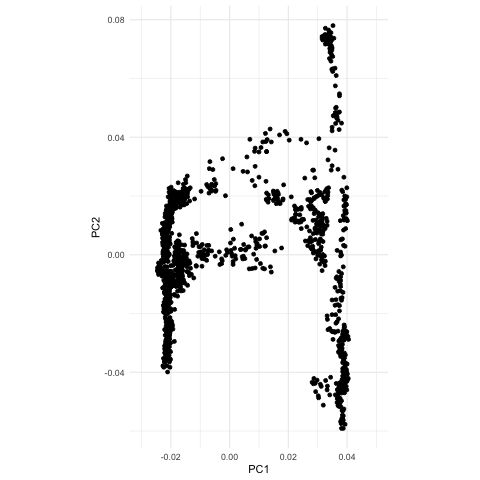

In [275]:
%%R
## First we subset the dataset to only the populations in the poplist
moderns_pl1 <- PCA_poplist1_ev %>% filter(Pop %in% poplist1$Pops)


p <- ggplot() +
     coord_equal(xlim=c(-0.03,0.05)) +
     theme_minimal()

p + geom_point(
        data=moderns_pl1, ##The input data for plotting
        aes(x=PC1, y=PC2) ## Define the x and y axis
        )


Within each smartpca run the direction of the eigenvectors is set randomly, meaning that your PCA plot might look very different to the one made by the person next to you. As was said in last week's session, the direction of the eigenvectors holds no specific meaning, so we can freely flip the axes of our PCA plot.

Often, the PCA plot has its axes rotated to (more or less) match with geography. First, let's see how Longiture and Latitude are correlated with our PCs by colouring the points by these values.

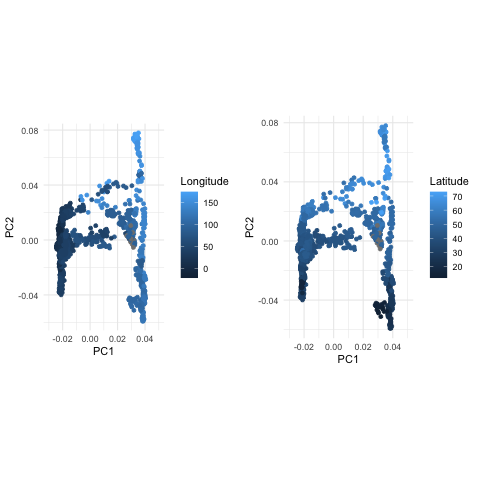

In [276]:
%%R
Lon_plot <- p +
    geom_point(data=moderns_pl1, aes(x=PC1, y=PC2, col=Longitude)) ## Here we also define the colour of the points based on a variable

Lat_plot <- p +
    geom_point(data=moderns_pl1, aes(x=PC1, y=PC2, col=Latitude))

gridExtra::grid.arrange(Lon_plot, Lat_plot, ncol=2)

It seems both Longitude and Latitude correlate strongly with a PC. Let's reorient or plot in that direction and instead, colour point by their country of origin.

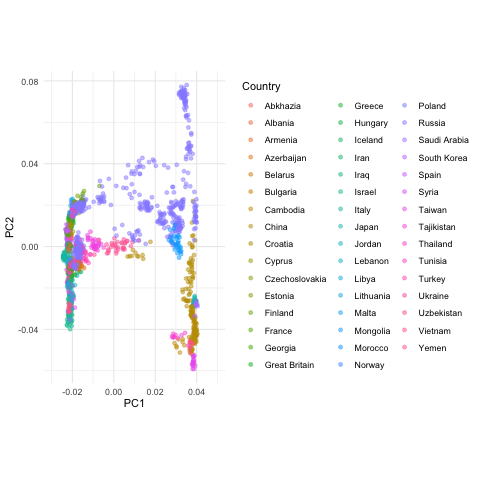

In [277]:
%%R
## Ensuruing the same "orientation" for all users.
corner_inds_pl1 <- moderns_pl1 %>% select(Ind, PC1, PC2) %>% filter(Ind %in% c("HGDP00607", "Sir50"))
if (corner_inds_pl1$PC1[1] > corner_inds_pl1$PC1[2]) { PCA_poplist1_ev <- PCA_poplist1_ev %>% mutate(PC1=-PC1)}
if (corner_inds_pl1$PC2[1] > corner_inds_pl1$PC2[2]) { PCA_poplist1_ev <- PCA_poplist1_ev %>% mutate(PC2=-PC2)}
moderns_pl1 <- PCA_poplist1_ev %>% filter(Pop %in% poplist1$Pops)


## Colour by country. 
PCA_plot_1 <- p +
    geom_point(data=moderns_pl1, 
               aes(x=PC1, y=PC2, col=Country), 
               alpha=0.5    ## Makes points semi transparent.
              )
PCA_plot_1

Our dataset included a single ancient individual, the 22,000 year old Siberian `MA1`. Let's add this projected individual to the plot as well.

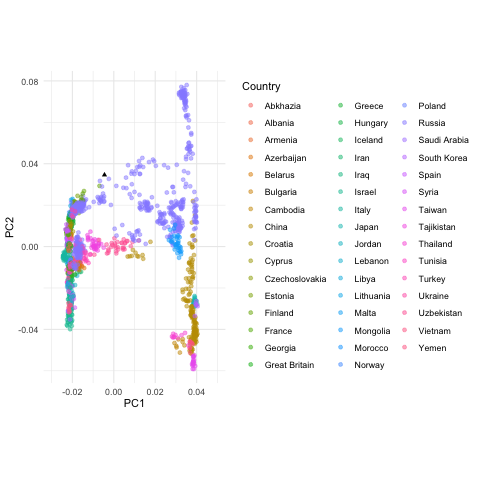

In [278]:
%%R
PCA_plot_1 +
    geom_point(
        data=PCA_poplist1_ev %>% filter(Ind=="MA1.SG"), ## Extract MA1 from the entire dataset
        aes(x=PC1, y=PC2),       ## Set the x and y axes for this set of points
        pch=17                   ## Change shape of point to solid triangle
    )

We can now see that `MA1` is projected roughly halfway between northeastern Siberian populations and northeastern European populations. How would the PCA as a whole, and the position of this individual change if we changed our poplist? 

Earlier we ran a second PCA, including some Native American populations in the poplist. Let's plot these results in the same way to see what happens.

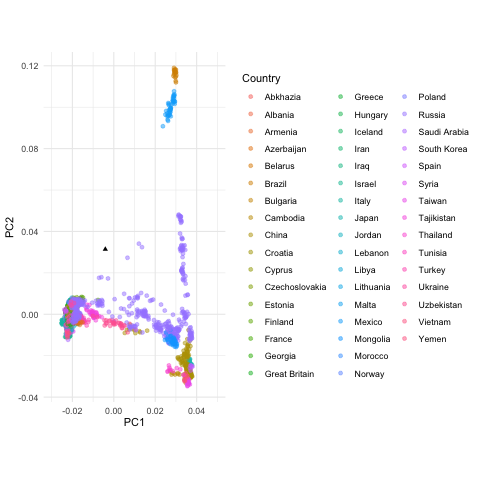

In [279]:
%%R
## First we reorient the PCA
corner_inds_pl2 <- PCA_poplist2_ev %>% select(Ind, PC1, PC2) %>% filter(Ind %in% c("HGDP00607", "Sir50"))
if (corner_inds_pl2$PC1[1] > corner_inds_pl2$PC1[2]) { PCA_poplist2_ev <- PCA_poplist2_ev %>% mutate(PC1=-PC1)}
if (corner_inds_pl2$PC2[1] > corner_inds_pl2$PC2[2]) { PCA_poplist2_ev <- PCA_poplist2_ev %>% mutate(PC2=-PC2)}
moderns_pl2 <- PCA_poplist2_ev %>% filter(Pop %in% poplist2$Pops)

## Then we plot the output
PCA_plot_2 <-  ggplot() +
     coord_equal(xlim=c(-0.03,0.05)) +
     theme_minimal() +
     geom_point(data=moderns_pl2, 
               aes(x=PC1, y=PC2, col=Country), 
               alpha=0.5    ## Makes points semi transparent.
               ) +
     geom_point(
        data=PCA_poplist2_ev %>% filter(Ind=="MA1.SG"), ## Extract MA1 from the entire dataset
        aes(x=PC1, y=PC2),       ## Set the x and y axes for this set of points
        pch=17                   ## Change shape of point to solid triangle
     )
PCA_plot_2

The addition of Native American populations has changed the plot considerably! Due to their unique population history, including multiple population bottlenecks, Native American populations have drifted from Eurasian populations. These differences are captured in PC2.
Importnantly, `MA1` is no longer projected between northeastern Siberians and northeastern Europeans, but further away from the Eurasian genetic variation, and "pulled" towards the cluster of Native American populations.